<a href="https://colab.research.google.com/github/Smartsie/Invest/blob/master/Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!dir

0P00000BFP\ Historische\ Data\ (1).csv	0P0000XZ4E\ Historical\ Data\ (1).csv
0P00000BFP\ Historische\ Data\ (2).csv	0P0000XZ4E\ Historical\ Data.csv
0P00000BFP\ Historische\ Data\ (3).csv	sample_data
0P00000BFP\ Historische\ Data.csv


In [112]:
import io
from google.colab import files
uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['0P00000BFP Historische Data.csv']))
df = pd.read_csv(io.BytesIO(uploaded['0P0000XZ4E Historical Data.csv']))

Saving 0P0000XZ4E Historical Data.csv to 0P0000XZ4E Historical Data (1).csv


In [0]:
df['Val']=cours

In [115]:
cours=df['Price'].values
# convert to float
a=[float(x.replace(".","").replace(",",".")) for x in cours]
df['Val']=a

AttributeError: ignored

In [0]:
# Calculate the average return by year as rolling average
# Then, plot the distribution to see which type of distribution it is
col_to_check='Val'
df['Variation']=df[col_to_check]/df[col_to_check].shift(-12)

In [0]:
var=df['Variation'].dropna()

In [121]:
# Stats
print("Mean return: ",var.mean())
print("Return Deviation",var.std())

Mean return:  1.0266246831647217
Return Deviation 0.05830390458402494


In [0]:
# BE6247121302 ING CP CFB C
#   0P0000XZ4E Historical Data.csv
#   Mean return:  1.0266246831647217
#   Return Deviation 0.05830390458402494
# LU0119195963 NN L Pat Bal PC
#   0P00000BFP Historische Data.csv
#   Mean return:  1.0386802046259886
#   Return Deviation 0.05287636012575688




In [0]:
# Chaque action a un return
interet=[1.0266246831647217,1.0386802046259886]
variation_interet_par_an=[0.05830390458402494,0.05287636012575688]

In [0]:
def generate_interest(interest,variation, year):
  x=np.random.normal(interest, variation,year)
  return np.cumprod(x)

In [0]:
Cash=10000


In [0]:
# What is best combination of portfolio which will minimize risk and maximize profit
experiments=500
a=np.linspace(0,1,experiments)
b=1-a
a=a*Cash
b=b*Cash


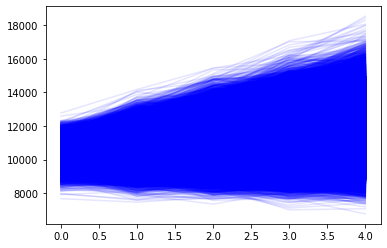

In [32]:
N=500
z=[]

for C1,C2 in zip(a,b):
  perc=[]
  for j in range(0,N):
    trace_a=np.multiply(C1,generate_interest(interet[0],variation_interet_par_an[0],5))
    trace_b=np.multiply(C2,generate_interest(interet[1],variation_interet_par_an[1],5))
    total=trace_a+trace_b
    plt.plot(total, color='blue',alpha=0.1)
    perc.append(total[-1])
  z.append([C1,C2,np.percentile(perc,50),np.percentile(perc,5),np.percentile(perc,95)])
plt.show()

In [0]:
import plotly.express as px

In [0]:
# Which is a and b which gives the highest min value for confidence interval?
df=pd.DataFrame(z,columns=['a','b','median','low','high'])

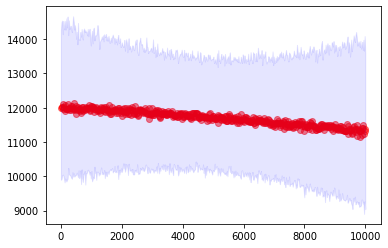

In [35]:
plt.scatter(df['a'],df['median'],color="red",alpha=0.5)
plt.fill_between(df['a'],df['low'],df['high'],color="blue",alpha=0.1)

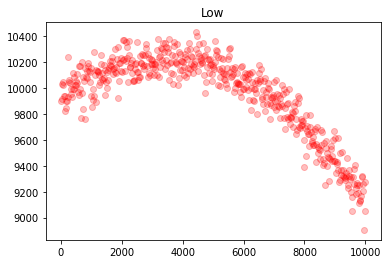

In [36]:
plt.scatter(df['a'],df['low'],color="red",alpha=0.25)
plt.title('Low')
plt.show()

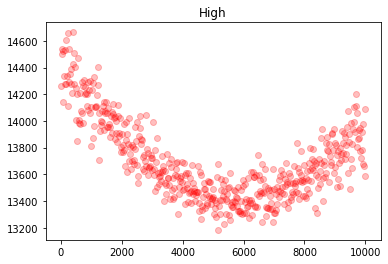

In [37]:
plt.scatter(df['a'],df['high'],color="red",alpha=0.25)
plt.title('High')
plt.show()

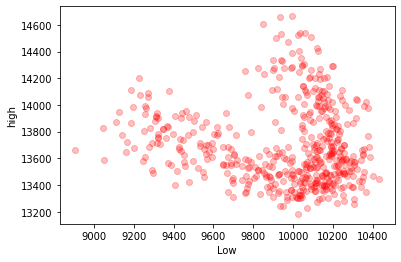

In [38]:
plt.scatter(df['low'],df['high'],color="red",alpha=0.25)
plt.xlabel('Low')
plt.ylabel('high')
plt.show()

In [43]:
px.scatter(df,x='low',y='median',color="high",hover_data=["a", "b"])

In [40]:
px.scatter_3d(df,x='low',y='high',z="median",color="a",hover_data=["a", "b"])